In [1]:
import pandas as pd 
import requests
import numpy as np
import json
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('atl_companies.csv')

/var/folders/37/z8s37wcd4j7182w5mdjdjxwr0000gn/T/ipykernel_43485/1536780890.py:1: DtypeWarning: Columns (4,21,22,39,42,43,44,45,49,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('atl_companies.csv')


In [3]:
data.shape

(139998, 54)

In [4]:
data.head(5)

,company_name,company_type,d_u_n_s_number,import_export,fax_no,global_duns_no,global_name,immediate_parent_duns_no,immediate_parent_name,latitude,line_of_business,longtitude,manufacturing_indicator,marketing_prescreen_score,marketing_prescreen_ranking,minority_owned_indicator,owns_rents,phone_no,subsidiary_status,web_address_url,year_of_founding,auditors,rank_type,trade_style,employer_id_number_ein,domestic_parent_duns_no,domestic_parent_name,location_type,mailing_address,mailing_city,mailing_country_region,mailing_county,mailing_state,mailing_zipcode,physical_address,physical_city,physical_country_region,physical_county,physical_state,physical_zipcode,primary_naics_code,primary_naics_description,secondary_naics_code,secondary_naics_description,secondary_sic_code,secondary_sic_description,primary_sic_code,primary_sic_description,sales,employee_all_sites,employee_this_site,sales_year_1,employees_total_year_1,facility_size
0,THE HOME DEPOT INC,Public,07-227-1711,Both,NaN,07-227-1711,THE HOME DEPOT INC,07-227-1711,THE HOME DEPOT INC,33.865494,RET LUMBER/BUILDING MATERIALS,-84.481830,Manufacturer,Low,2 - Likely to pay,No,NaN,(770) 433-8211,Non-Subsidiary,WWW.HOMEDEPOT.COM,1978.0,KPMG LLP,FORTUNE 1000 (June 2022),"HOME DEPOT, THE",953261426.0,07-227-1711,THE HOME DEPOT INC,Headquarters,NaN,NaN,NaN,NaN,NaN,NaN,2455 PACES FERRY RD SE,ATLANTA,USA,FULTON,GEORGIA,303396444,444180.0,NaN,"444110, 444120, 444130","&quot;Home Centers &quot;, &quot;Paint and Wal...","5211, 5231, 5251",&quot;Lumber and other building materials&quot...,52110000.0,Lumber and other building materials\r,"$151,157,000,000","490,600","4,600","$151,157,000,000","490,600",0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FORTUNE Global 500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GENUINE PARTS COMPANY,Public,00-692-4948,Both,NaN,00-692-4948,GENUINE PARTS COMPANY,00-692-4948,GENUINE PARTS COMPANY,33.911173,WHOL AUTO PARTS/SUPPLIES,-84.455822,Manufacturer,Low,2 - Likely to pay,No,Owns,(678) 934-5000,Non-Subsidiary,WWW.GENPT.COM,1928.0,Ernst &amp; Young LLP,FORTUNE 1000 (June 2022),NaN,251590748.0,00-692-4948,GENUINE PARTS COMPANY,Headquarters,NaN,NaN,NaN,NaN,NaN,NaN,2999 WILDWOOD PKWY,ATLANTA,USA,FULTON,GEORGIA,303398580,423120.0,Motor Vehicle Supplies and New Parts Merchant ...,"423120, 423210, 423830, 423840, 441310",&quot;Motor Vehicle Supplies and New Parts Mer...,"5013, 5021, 5084, 5085, 5531",&quot;Motor vehicle supplies and new parts&quo...,50130100.0,Automotive supplies and parts\r,"$18,870,510,000","52,000","1,300","$18,870,510,000","52,000",0
3,"ASBURY AUTOMOTIVE GROUP, INC.",Public,04-390-5384,NaN,NaN,04-390-5384,"ASBURY AUTOMOTIVE GROUP, INC.",04-390-5384,"ASBURY AUTOMOTIVE GROUP, INC.",34.005075,RET NEW/USED AUTOMOBILES,-84.093248,Manufacturer,Low,1 - Most likely to pay,No,Rent,(770) 418-8200,Non-Subsidiary,WWW.ASBURYAUTO.COM,1994.0,Ernst &amp; Young LLP,FORTUNE 1000 (June 2022),ASBURY,10609375.0,04-390-5384,"ASBURY AUTOMOTIVE GROUP, INC.",Headquarters,NaN,NaN,NaN,NaN,NaN,NaN,2905 PREMIERE PKWY STE 3,DULUTH,USA,FULTON,GEORGIA,300975247,441110.0,New Car Dealers,441110,&quot;New Car Dealers &quot;,5511,&quot;New and used car dealers&quot;,55119901.0,"Automobiles, new and used\r","$9,837,700,000","14,200",435,"$9,837,700,000","14,200",0
4,HDS HOLDING CORPORATION,Private,82-587-9104,NaN,NaN,07-227-1711,THE HOME DEPOT INC,82-584-0593,"HD SUPPLY HOLDINGS, INC.",33.877308,WHOL SERVICE ESTABLISHMENT EQUIPMENT,-84.466097,Manufacturer,Medium,1 - Most likely to pay,No,Rent,(770) 852-9000,Subsidiary,WWW.HDSUPPLY.COM,2007.0,NaN,NaN,NaN,650923839.0,07-227-1711,THE HOME DEPOT INC,Headquarters,NaN,NaN,NaN,NaN,NaN,NaN,3100 CUMBERLAND BLVD SE,ATLANTA,USA,FULTON,GEORGIA,303395940,423850.0,Service Establishment Equipment and Supplies M...,NaN,NaN,NaN,NaN,50870300.0,Cleaning and maintenance equipment and supplies\r,"$8,016,521,739","15,000",2,"$8,016,5

In [6]:
data.company_type.value_counts(normalize = True)

Private    0.999843
Public     0.000157
Name: company_type, dtype: float64

In [7]:
data.line_of_business.nunique()

294

In [8]:
data.owns_rents.value_counts(normalize = True)

Rent    0.835167
Owns    0.164833
Name: owns_rents, dtype: float64

In [10]:
data.rank_type.unique()

array(['FORTUNE 1000 (June 2022)', 'FORTUNE Global 500', nan],
      dtype=object)

In [11]:
data.auditors.value_counts(normalize = True)

Ernst &amp; Young LLP                                        0.481481
Deloitte &amp; Touche LLP                                    0.148148
PricewaterhouseCoopers LLP                                   0.074074
KPMG LLP                                                     0.037037
KPMG Hartkopf + Rentrop                                      0.037037
KPMG Deutsche Treuhand-Gesellschaft AG                       0.037037
McGladrey LLP                                                0.037037
Braver, Schimler &amp; Company, P.C.                         0.037037
Grant Thornton                                               0.037037
Follmer Rudzewicz PLC                                        0.037037
Kempisty &amp; Company Certified Public Accountants, P.C.    0.037037
Name: auditors, dtype: float64

In [14]:
data.location_type.value_counts()

Single Location    131512
Branch               6051
Headquarters         2434
Name: location_type, dtype: int64

In [17]:
data.physical_county.value_counts()

FULTON        36859
GWINNETT      23770
DEKALB        19362
COBB          17948
CLAYTON        5300
CHEROKEE       5033
HENRY          4779
FORSYTH        3045
FAYETTE        3040
DOUGLAS        2979
COWETA         2274
ROCKDALE       2239
WALTON         2233
CARROLL        2216
BARTOW         2112
NEWTON         1809
PAULDING       1774
BARROW         1316
SPALDING       1230
PICKENS         652
MIAMI-DADE        2
JACKSON           2
HALL              2
NASSAU            2
JEFFERSON         1
DAWSON            1
CLARK             1
CLARKE            1
OKLAHOMA          1
MACOMB            1
CHAMBERS          1
HARRIS            1
SAN DIEGO         1
MILWAUKEE         1
SACRAMENTO        1
PEACH             1
LEXINGTON         1
GILMER            1
HEARD             1
LEE               1
MUSCOGEE          1
ARLINGTON         1
MULTNOMAH         1
Name: physical_county, dtype: int64

In [5]:
df = pd.read_csv('free_company_dataset.csv' , on_bad_lines='skip')
df.shape

(11753464, 10)

In [37]:
usa = df[df.country == 'united states']

In [38]:
GA = usa[usa.region == 'georgia']

In [41]:
atlanta = GA[GA.locality == 'atlanta']

In [42]:
atlanta.sample(5)

,country,founded,id,industry,linkedin_url,locality,name,region,size,website
5367548,united states,2021.0,epoc-harvest,financial services,linkedin.com/company/epoc-harvest,atlanta,epocharvest,georgia,1-10,NaN
217784,united states,2016.0,payover-travel,NaN,linkedin.com/company/payover-travel,atlanta,payover travel,georgia,201-500,NaN
7679428,united states,2012.0,national-collegiate-sports-archives-llc,sports,linkedin.com/company/national-collegiate-sport...,atlanta,"national collegiate sports archives, llc",georgia,11-50,ncsavault.com
11486336,united states,NaN,wgcl-cbs-atlanta,broadcast media,linkedin.com/company/wgcl-cbs-atlanta,atlanta,wgcl/cbs46,georgia,51-200,cbs46.com
1337450,united states,2018.0,paypertrail-financial-services-llc,financial services,linkedin.com/company/paypertrail-financial-ser...,atlanta,paypertrail financial services llc,georgia,1-10,mypaypertrail.com


In [50]:
atlanta.industry.value_counts(normalize = True)

marketing and advertising               0.058499
information technology and services     0.052861
real estate                             0.044385
financial services                      0.040222
management consulting                   0.034282
construction                            0.031368
computer software                       0.030309
law practice                            0.030233
hospital & health care                  0.026563
non-profit organization management      0.022628
staffing and recruiting                 0.021984
health, wellness and fitness            0.021492
entertainment                           0.019146
retail                                  0.017330
design                                  0.017103
internet                                0.016044
consumer services                       0.015627
medical practice                        0.014795
professional training & coaching        0.014757
media production                        0.014379
education management

In [7]:
## read in data for EDA
ref_df = pd.read_csv('Team105-main/data/reference-usa-atlanta-10-pct.csv' ,low_memory=False)
ref_df.head()

,Unnamed: 0,Company Name,Parent Company Name,Executive First Name,Executive Last Name,Professional Title,Executive Title,Executive Gender,Address,City,State,ZIP Code,ZIP Four,Carrier Route,Delivery Point Barcode,County,Metro Area,Neighborhood,Phone Number Combined,Fax Number Combined,Toll Free Number Combined,Website,Company Description,Primary SIC Code,Primary SIC Description,Primary SIC Ad Size,Primary SIC Year Appeared,SIC Code 1,SIC Code 1 Description,SIC Code 1 Ad Size,SIC Code 1 Year Appeared,SIC Code 2,SIC Code 2 Description,SIC Code 2 Ad Size,SIC Code 2 Year Appeared,SIC Code 3,SIC Code 3 Description,SIC Code 3 Ad Size,SIC Code 3 Year Appeared,SIC Code 4,SIC Code 4 Description,SIC Code 4 Ad Size,SIC Code 4 Year Appeared,SIC Code 5,SIC Code 5 Description,SIC Code 5 Ad Size,SIC Code 5 Year Appeared,SIC Code 6,SIC Code 6 Description,SIC Code 6 Ad Size,SIC Code 6 Year Appeared,SIC Code 7,SIC Code 7 Description,SIC Code 7 Ad Size,SIC Code 7 Year Appeared,SIC Code 8,SIC Code 8 Description,SIC Code 8 Ad Size,SIC Code 8 Year Appeared,SIC Code 9,SIC Code 9 Description,SIC Code 9 Ad Size,SIC Code 9 Year Appeared,SIC Code 10,SIC Code 10 Description,SIC Code 10 Ad Size,SIC Code 10 Year Appeared,Primary NAICS,Primary NAICS Description,NAICS 1,NAICS 1 Description,NAICS 2,NAICS 2 Description,NAICS 3,NAICS 3 Description,NAICS 4,NAICS 4 Description,NAICS 5,NAICS 5 Description,NAICS 6,NAICS 6 Description,NAICS 7,NAICS 7 Description,NAICS 8,NAICS 8 Description,NAICS 9,NAICS 9 Description,NAICS 10,NAICS 10 Description,Franchise Description 1,Franchise Description 2,Franchise Description 3,Franchise Description 4,Franchise Description 5,Cuisine Code,Cuisine Code Description,Location Employee Size Range,Location Employee Size Actual,Location Sales Volume Range,Location Sales Volume Actual,Corporate Employee Size Range,Corporate Employee Size Actual,Corporate Sales Volume Range,Corporate Sales Volume Actual,Type of Business,Location Type,IUSA Number,Parent IUSA Number,Subsidiary IUSA Number,Foreign Parent Flag,EIN 1,EIN 2,EIN 3,Fortune 1000 Ranking,Credit Cards Accepted,Last Updated On,Years In Database,Year Established,Square Footage,Home Business,Credit Score Alpha,Latitude,Longitude,Government Office,Location Centerpoint,Import Export Flag,Own or Lease,Firm or Individual,Monday Open,Monday Close,Tuesday Open,Tuesday Close,Wednesday Open,Wednesday Close,Thursday Open,Thursday Close,Friday Open,Friday Close,Saturday Open,Saturday Close,Sunday Open,Sunday Close,Executive First Name 1,Executive Last Name 1,Executive Title 1,Executive Gender 1,Executive First Name 2,Executive Last Name 2,Executive Title 2,Executive Gender 2,Executive First Name 3,Executive Last Name 3,Executive Title 3,Executive Gender 3,Executive First Name 4,Executive Last Name 4,Executive Title 4,Executive Gender 4,Executive First Name 5,Executive Last Name 5,Executive Title 5,Executive Gender 5,Executive First Name 6,Executive Last Name 6,Executive Title 6,Executive Gender 6,Executive First Name 7,Executive Last Name 7,Executive Title 7,Executive Gender 7,Executive First Name 8,Executive Last Name 8,Executive Title 8,Executive Gender 8,Executive First Name 9,Executive Last Name 9,Executive Title 9,Executive Gender 9,Executive First Name 10,Executive Last Name 10,Executive Title 10,Executive Gender 10,Executive First Name 11,Executive Last Name 11,Executive Title 11,Executive Gender 11,Executive First Name 12,Executive Last Name 12,Executive Title 12,Executive Gender 12,Executive First Name 13,Executive Last Name 13,Executive Title 13,Executive Gender 13,Executive First Name 14,Executive Last Name 14,Executive Title 14,Executive Gender 14,Executive First Name 15,Executive Last Name 15,Executive Title 15,Executive Gender 15,Executive First Name 16,Executive Last Name 16,Executive Title 16,Executive Gender 16,Executive First Name 17,Executive Last Name 17,Executive Title 17,Executive Gender 17,Executive First Name 18,Executive Last Name 18,Executive Title 18,Executive Gender 

In [8]:
ref_df.shape

(11050, 384)

In [17]:
## how many unique businesses are in the atlanta region 
ref_df[ref_df.City == 'Atlanta']['Company Name'].nunique()

2088

In [12]:
## how many different zip codes exist for these businesses in ATL 
ref_df[ref_df.City == 'Atlanta']['ZIP Code'].nunique()

54

In [13]:
ref_df[ref_df.City == 'Atlanta']['ZIP Code'].unique()

array([30312, 30308, 30349, 30342, 30324, 30339, 30309, 30326, 30354,
       30318, 30310, 30303, 30305, 30307, 30316, 30338, 30355, 30336,
       30313, 30317, 30331, 30341, 30361, 30314, 30340, 30306, 30009,
       31150, 30344, 30311, 30319, 30315, 30304, 30360, 30328, 30329,
       30345, 30346, 30350, 39901, 30301, 30337, 30363, 30320, 30327,
       30040, 30332, 30322, 31119, 30032, 31107, 30144, 30366, 30033])

In [14]:
## how many different counties in the atlanta region 
ref_df[ref_df.City == 'Atlanta']['County'].nunique()

6

In [15]:
ref_df[ref_df.City == 'Atlanta']['County'].unique()

array(['Fulton', 'Clayton', 'Cobb', 'De Kalb', 'Gwinnett', 'Forsyth'],
      dtype=object)

In [44]:
atl = ref_df[ref_df.City == 'Atlanta']

In [45]:
## what is the number of business based on category
atl['Primary SIC Description'].nunique()

512

In [46]:
## how many companies are owned by a parent company
atl[~atl['Parent Company Name'].isnull()]['Parent Company Name'].nunique()

191

In [47]:
## look at parent companies 
parents = atl[~atl['Parent Company Name'].isnull()]
parents.groupby(['Parent Company Name']).agg({'Company Name':'nunique'}).sort_values(by = 'Company Name' , ascending = False).head(20)

,Company Name
Parent Company Name,
BP AMERICA INC,13
CITGO PETROLEUM CORP,10
ACE HARDWARE CORP,5
ROARK CAPITAL GROUP,5
L CATTERTON,4
URBAN OUTFITTERS INC,4
GAP INC,4
CHEVRON CORP,4
ANTICO FOODS LLC,3


In [48]:
## distribution of sales volume amount the companies
atl['Location Sales Volume Range'].value_counts(normalize = True)

Less Than $500,000    0.352837
$500,000-1 Million    0.272163
$1-2.5 Million        0.205674
$2.5-5 Million        0.093085
$5-10 Million         0.051862
$10-20 Million        0.017287
$20-50 Million        0.004876
$100-500 Million      0.001773
$50-100 Million       0.000443
Name: Location Sales Volume Range, dtype: float64

In [49]:
### What is the most common type of business 
atl['Type of Business'].value_counts(normalize = True)

Private                     0.935524
Branch of Public Company    0.064476
Name: Type of Business, dtype: float64

In [51]:
## most common type of building used 
atl['Square Footage'].value_counts(normalize = True)

2,500 - 4,999      0.245591
1,500 - 2,499      0.232363
5,000 - 9,999      0.141534
10,000 - 19,999    0.123016
1 - 1,499          0.116843
20,000 - 39,999    0.073192
40,000 - 99,999    0.049824
100,000+           0.017637
Name: Square Footage, dtype: float64

In [54]:
atl['Rent Expenses'].value_counts(normalize = True)

Less than $10,000       0.299552
$25,000 to $50,000      0.271300
$10,000 to $25,000      0.258296
$50,000 to $100,000     0.105381
$100,000 to $250,000    0.054260
$250,000 to $500,000    0.007623
Over $500,000           0.003587
Name: Rent Expenses, dtype: float64

In [56]:
## groupby zip code and sqr footage 
atl.groupby(['ZIP Code' , 'Square Footage']).agg({'Company Name':'nunique'}).head()

,,Company Name
ZIP Code,Square Footage,
30009,"1,500 - 2,499",2
30032,"1 - 1,499",1
30033,"2,500 - 4,999",1
30040,"10,000 - 19,999",1
30144,"1,500 - 2,499",1


In [57]:
zipVsSqr = atl.groupby(['ZIP Code' , 'Square Footage']).agg({'Company Name':'nunique'}).reset_index()

In [62]:
zipVsSqr['ZIP Code'] = zipVsSqr['ZIP Code'].astype(str)

In [66]:
zipVsSqr.dtypes

ZIP Code          object
Square Footage    object
Company Name       int64
dtype: object

In [59]:
import plotly.graph_objects as go

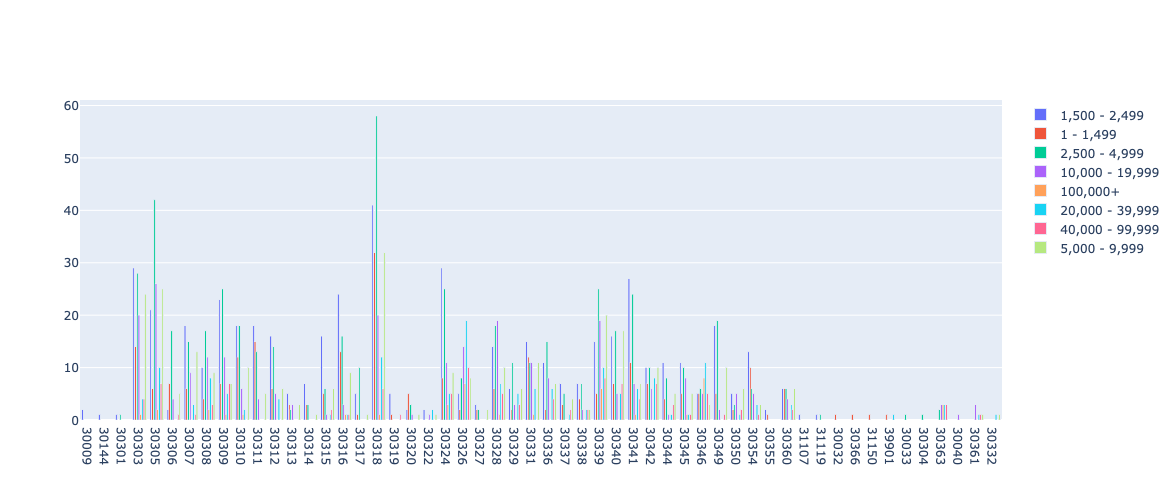

In [81]:
fig = go.Figure()
for i in zipVsSqr['Square Footage'].unique():
    mdf = zipVsSqr[zipVsSqr['Square Footage'] == i]
    fig.add_trace(go.Bar(x = mdf['ZIP Code'].unique() , y = mdf['Company Name'] , name = i))
fig.update_layout(
    autosize=True,
    width=1200,
    height=500)
fig.show()

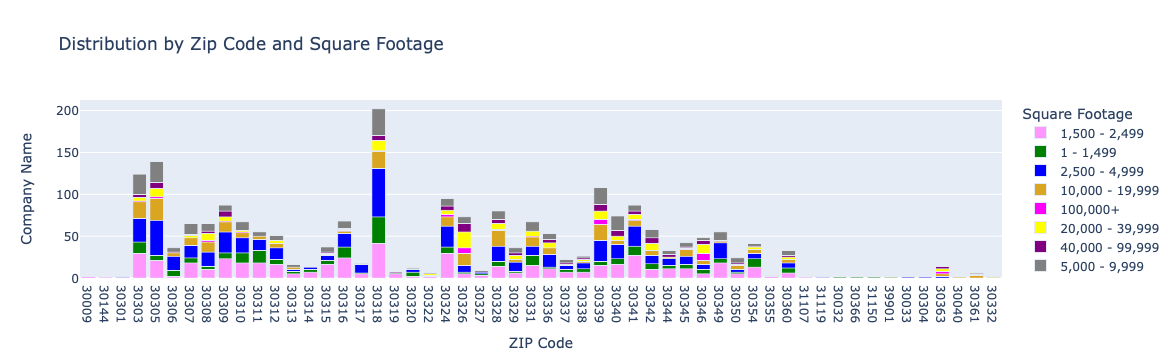

In [82]:
import plotly.express as px
fig = px.bar(zipVsSqr, y="Company Name", x="ZIP Code", color="Square Footage", hover_name="Square Footage",
             color_discrete_map={
                "'1,500 - 2,499'": "red",
                "1 - 1,499": "green",
                "2,500 - 4,999": "blue",
                "10,000 - 19,999": "goldenrod",
                "100,000+": "magenta" , 
                 "20,000 - 39,999":"yellow",
                 "40,000 - 99,999": "purple",
                 "5,000 - 9,999":"grey"
             },
             title="Distribution by Zip Code and Square Footage")

fig.show()

In [83]:
##traffic data 
traf = pd.read_csv('Team105-main/data/Traffic (raw, whole state)/annualized_statistics.csv')
traf.shape

(25966, 14)

In [84]:
traf.sample(5)

,Station ID,Functional Class,Lat/Long,Year,AADT,Statistics type,Single-Unit Truck AADT,Combo-Unit Truck AADT,% Peak SU Trucks,% Peak CU Trucks,K-Factor,D-Factor,Future AADT,Station Type
668,013-8052,7U : Urban Local,"33.950617, -83.780686",2021,6190,Actual,286.0,11.0,1.066,0.000,0.1232,0.63,7800,Short Term
18716,215-0158,3U : Urban Principal Arterial - Other,"32.506942, -84.958632",2021,35700,Estimated,953.0,213.0,0.224,0.033,0.0902,0.59,49700,Short Term
1645,021-r003,1U : Urban Principal Arterial - Interstate,"32.754907, -83.708174",2021,4020,Estimated,NaN,NaN,NaN,NaN,0.1317,1.00,5070,Short Term
12935,131-0109,4R : Rural Minor Arterial,"30.749420, -84.334958",2021,2390,Actual,NaN,NaN,NaN,NaN,0.0922,0.59,3010,Short Term
6436,073-r801,1R : Rural Principal Arterial - Interstate,"33.497199, -82.313201",2021,3460,Estimated,NaN,NaN,NaN,NaN,0.1322,1.00,5620,Short Term


In [85]:
truck = pd.read_csv('Team105-main/data/Traffic (raw, whole state)/aadt_and_truckpct.csv')
truck.shape

(27228, 23)

In [86]:
truck.sample(5)

,Station ID,Functional Class,Lat/Long,AADT_2021,Truck%_2021,AADT_2020,Truck%_2020,AADT_2019,Truck%_2019,AADT_2018,Truck%_2018,AADT_2017,Truck%_2017,AADT_2016,Truck%_2016,AADT_2015,Truck%_2015,AADT_2014,Truck%_2014,AADT_2013,Truck%_2013,AADT_2012,Truck%_2012
23294,269-0198,5R : Rural Major Collector,"32.556435, -84.253888",650.0,NaN,830.0,NaN,860.0,NaN,950.0,NaN,960.0,NaN,930.0,11.4,880.0,11.6,810.0,11.5,810.0,11.5,1130.0,11.4
14680,139-0113,5R : Rural Major Collector,"34.356215, -83.891321",6100.0,NaN,5800.0,NaN,5840.0,NaN,5840.0,NaN,5920.0,NaN,5750.0,2.7,5460.0,2.7,5210.0,2.8,5210.0,2.8,5210.0,2.8
2666,037-0107,5R : Rural Major Collector,"31.449120, -84.740491",360.0,NaN,340.0,NaN,560.0,NaN,560.0,NaN,570.0,NaN,550.0,NaN,520.0,NaN,500.0,NaN,470.0,NaN,470.0,NaN
18668,195-8067,7R : Rural Local,"34.156466, -83.125571",20.0,NaN,10.0,NaN,10.0,NaN,10.0,NaN,10.0,NaN,10.0,NaN,10.0,NaN,10.0,NaN,10.0,NaN,10.0,NaN
13741,133-8044,7R : Rural Local,"33.672271, -83.143559",20.0,NaN,20.0,NaN,20.0,NaN,20.0,NaN,30.0,NaN,30.0,NaN,30.0,NaN,30.0,NaN,30.0,NaN,30.0,NaN


In [88]:
traf['Functional Class'].unique()

array(['3U : Urban Principal Arterial - Other',
       '3R : Rural Principal Arterial - Other',
       '4R : Rural Minor Arterial', '4U : Urban Minor Arterial',
       '5R : Rural Major Collector', '6U : Urban Minor Collector',
       '6R : Rural Minor Collector', '7R : Rural Local',
       '7U : Urban Local', '1U : Urban Principal Arterial - Interstate',
       '1R : Rural Principal Arterial - Interstate', nan,
       '5U : Urban Major Collector',
       '2U : Urban Principal Arterial - Freeways & Expressways'],
      dtype=object)